# I. PyTorch

In [114]:
import torch
from torchvision import datasets, transforms, models
from torch import nn
from collections import OrderedDict
from torch import optim
import torch.nn.functional as F
from torch.autograd import Variable

import helper

### 1. tensors

In [3]:
# tensor
x = torch.rand(3, 2)
y = torch.ones(x.size())

# index
z = x + y
z[0]
z[:, 1:]

# operation
z.add(1)
z.add_(1)
z.resize_(2, 3)

tensor([[2.1492, 2.6356, 2.4121],
        [2.9150, 2.0636, 2.8838]])

### 2. build Neural Network

In [4]:
# build model
# Define a transform to normalize the data
# https://pytorch-cn.readthedocs.io/zh/latest/torchvision/torchvision-transform/
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                             ])
# Download and load the training data
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.MNIST('MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(784, 400)),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(400, 200)),
                      ('relu2', nn.ReLU()),
                      ('fc3', nn.Linear(200, 100)),
                      ('relu3', nn.ReLU()),
                      ('output', nn.Linear(100, 10)),
                      ('softmax', nn.Softmax(dim = 1))]))
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])

# another way
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Defining the layers, 128, 64, 10 units each
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        # Output layer, 10 units - one for each digit
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        ''' Forward pass through the network, returns the output logits '''
        
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softmax(x, dim=1)
        
        return x

### 3. training neural network

In [18]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                             ])
# Download and load the training data
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
# Download and load the test data
testset = datasets.MNIST('MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Defining the layers, 200, 50, 10 units each
        self.fc1 = nn.Linear(784, 200)
        self.fc2 = nn.Linear(200, 50)
        # Output layer, 10 units - one for each digit
        self.fc3 = nn.Linear(50, 10)
        
    def forward(self, x):
        ''' Forward pass through the network, returns the output logits '''
        
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        
        return x
    
    def predict(self, x):
        ''' This function for predicts classes by calculating the softmax '''
        logits = self.forward(x)
        return F.softmax(logits, dim=1)

# # Hyperparameters for our network
# input_size = 784
# hidden_sizes = [128, 64]
# output_size = 10

# # Build a feed-forward network
# net = nn.Sequential(OrderedDict([
#                       ('fc1', nn.Linear(input_size, hidden_sizes[0])),
#                       ('relu1', nn.ReLU()),
#                       ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
#                       ('relu2', nn.ReLU()),
#                       ('logits', nn.Linear(hidden_sizes[1], output_size))]))
    
net = Network()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

epochs = 1
steps = 0
running_loss = 0
print_every = 20
for e in range(epochs):
    for images, labels in iter(trainloader):
        steps += 1
        # Flatten MNIST images into a 784 long vector
        images.resize_(images.size()[0], 784)
        
        # Wrap images and labels in Variables so we can calculate gradients
        inputs = Variable(images)
        targets = Variable(labels)
        optimizer.zero_grad()
        
        output = net.forward(inputs)
        loss = criterion(output, targets)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if steps % print_every == 0:
            # Test accuracy
            accuracy = 0
            for ii, (images, labels) in enumerate(testloader):
                
                images = images.resize_(images.size()[0], 784)
                inputs = Variable(images)
                
                predicted = net.predict(inputs).data
                equality = (labels == predicted.max(1)[1])
                accuracy += equality.type_as(torch.FloatTensor()).mean()
            
            print("Epoch: {}/{}".format(e+1, epochs),
                  "Loss: {:.4f}".format(running_loss/print_every),
                  "Test accuracy: {:.4f}".format(accuracy/(ii+1)))
            running_loss = 0

G:\Anaconda3\lib\site-packages\ipykernel_launcher.py:69: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.


Epoch: 1/1 Loss: 1.9342 Test accuracy: 0.6054
Epoch: 1/1 Loss: 1.1586 Test accuracy: 0.7762
Epoch: 1/1 Loss: 0.7318 Test accuracy: 0.8087
Epoch: 1/1 Loss: 0.6189 Test accuracy: 0.8108
Epoch: 1/1 Loss: 0.5477 Test accuracy: 0.8632
Epoch: 1/1 Loss: 0.4720 Test accuracy: 0.8588
Epoch: 1/1 Loss: 0.4558 Test accuracy: 0.8778
Epoch: 1/1 Loss: 0.4596 Test accuracy: 0.8862
Epoch: 1/1 Loss: 0.4478 Test accuracy: 0.8863
Epoch: 1/1 Loss: 0.4198 Test accuracy: 0.8868
Epoch: 1/1 Loss: 0.4488 Test accuracy: 0.8863
Epoch: 1/1 Loss: 0.4108 Test accuracy: 0.8874
Epoch: 1/1 Loss: 0.3734 Test accuracy: 0.8842
Epoch: 1/1 Loss: 0.3964 Test accuracy: 0.8847
Epoch: 1/1 Loss: 0.3663 Test accuracy: 0.8970
Epoch: 1/1 Loss: 0.3659 Test accuracy: 0.9071
Epoch: 1/1 Loss: 0.3523 Test accuracy: 0.9052
Epoch: 1/1 Loss: 0.3459 Test accuracy: 0.9063
Epoch: 1/1 Loss: 0.3388 Test accuracy: 0.8997
Epoch: 1/1 Loss: 0.3649 Test accuracy: 0.9064
Epoch: 1/1 Loss: 0.3193 Test accuracy: 0.9091
Epoch: 1/1 Loss: 0.2959 Test accur

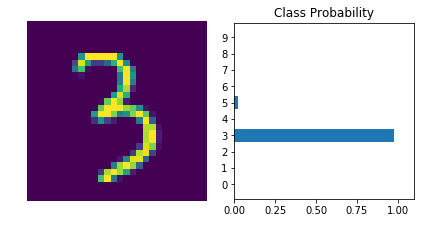

In [17]:
# get data
dataiter = iter(testloader)
images, labels = dataiter.next()
# predict images
img = images[1]
ps = net.predict(Variable(img.resize_(1, 784)))
helper.view_classify(img.resize_(1, 28, 28), ps)

### 4. Fashion-MNIST Exercise

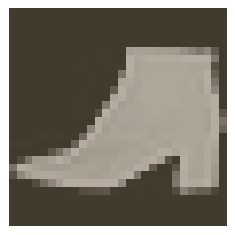

In [79]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

In [86]:
# Implement a function for the validation pass
def validation(model, testloader, criterion):
    test_loss = 0
    accuracy = 0
    for images, labels in testloader:

        images.resize_(images.shape[0], 784)

        output = model.forward(images)
        test_loss += criterion(output, labels).item()

        ps = torch.exp(output)
        equality = (labels.data == ps.max(dim=1)[1])
        accuracy += equality.type(torch.FloatTensor).mean()
    
    return test_loss, accuracy

In [89]:
class Network(nn.Module):
    def __init__(self, input_size, output_size, hidden_layers, drop_p = 0.5):
        '''
        input_size: len of vector
        hidden_layer: [100, 200, 300]
        output_size: classes
        '''
        super().__init__()
        # define neural network structure
        self.hidden_layers = nn.ModuleList([nn.Linear(input_size, hidden_layers[0])])
        layer_sizes = zip(hidden_layers[:-1], hidden_layers[1:])
        self.hidden_layers.extend([nn.Linear(h1, h2) for h1, h2 in layer_sizes])
        self.output = nn.Linear(hidden_layers[-1], output_size)
        # add drop out
        self.dropout = nn.Dropout(p = drop_p)
        
    def forward(self, x):
        ''' Forward pass through the network, returns the output logits '''
        
        # Forward through each layer in `hidden_layers`, with ReLU activation and dropout
        for linear in self.hidden_layers:
            x = F.relu(linear(x))
            x = self.dropout(x)
        
        x = self.output(x)
        return F.log_softmax(x, dim=1)
# create the network, define the criterion and optimizer
model = Network(784, 10, [516, 256], drop_p = 0.5)
criterion = nn.NLLLoss()
# Adam with momentum
optimizer = optim.Adam(model.parameters(), lr = 0.001)

# training
# period, gen
epochs = 2
steps = 0
runnning_lose = 0
print_every = 40

for e in range(epochs):
    # dropout turn on when training
    model.train()
    for images, labels in trainloader:
        steps += 1
        images.resize_(images.size()[0], 784)
        images, labels = Variable(images), Variable(labels)
        optimizer.zero_grad()
        
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if steps%print_every == 0:
            # dropout turn off when inference
            model.eval()   
            accuracy = 0
            test_loss = 0
            
#             # code as a function
#             # Turn off gradients for validation, saves memory and computations
#             with torch.no_grad():
#                 test_loss, accuracy = validation(model, testloader, criterion)
            
            # Turn off gradients for validation, saves memory and computations
            with torch.no_grad():
                for images, labels in testloader:
                    images = images.resize_(images.size()[0], 784)
                    output = model.forward(images)
                    test_loss += criterion(output, labels).item()

                    # calculate the accuracy
                    ps = torch.exp(output).data
                    equality = (labels.data == ps.max(dim=1)[1])
                    # equality 0,1,0,1,1,1,0,0,0,0,1,1,1
                    accuracy += equality.type_as(torch.FloatTensor()).mean()

            print("Epoch: {}/{}.. ".format(e+1, epochs),
                  "Training Loss: {:.3f}.. ".format(running_loss/print_every),
                  "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
                  "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))
            runnning_loss = 0
            model.train()

Epoch: 1/2..  Training Loss: 56.598..  Test Loss: 0.732..  Test Accuracy: 0.732
Epoch: 1/2..  Training Loss: 57.417..  Test Loss: 0.634..  Test Accuracy: 0.763
Epoch: 1/2..  Training Loss: 58.178..  Test Loss: 0.609..  Test Accuracy: 0.769
Epoch: 1/2..  Training Loss: 58.860..  Test Loss: 0.606..  Test Accuracy: 0.771
Epoch: 1/2..  Training Loss: 59.487..  Test Loss: 0.555..  Test Accuracy: 0.794
Epoch: 1/2..  Training Loss: 60.098..  Test Loss: 0.586..  Test Accuracy: 0.779
Epoch: 1/2..  Training Loss: 60.686..  Test Loss: 0.551..  Test Accuracy: 0.795
Epoch: 1/2..  Training Loss: 61.289..  Test Loss: 0.515..  Test Accuracy: 0.817
Epoch: 1/2..  Training Loss: 61.902..  Test Loss: 0.520..  Test Accuracy: 0.813
Epoch: 1/2..  Training Loss: 62.501..  Test Loss: 0.511..  Test Accuracy: 0.805
Epoch: 1/2..  Training Loss: 63.055..  Test Loss: 0.497..  Test Accuracy: 0.821
Epoch: 1/2..  Training Loss: 63.563..  Test Loss: 0.490..  Test Accuracy: 0.814
Epoch: 1/2..  Training Loss: 64.129..  T

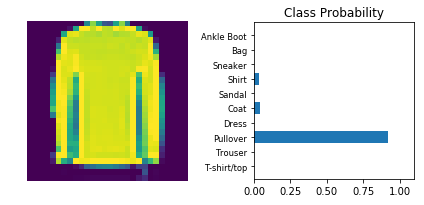

In [96]:
# Test out your network!
model.eval()
dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.view(1, 784)
# Calculate the class probabilities (softmax) for img
with torch.no_grad():
    output = model.forward(img)
ps = torch.exp(output)
# Plot the image and probabilities
helper.view_classify(img.view(1, 28, 28), ps, version='Fashion')

### 5. Save and load model

In [97]:
print("Our model: \n\n", model, '\n')
print("The state dict keys: \n\n", model.state_dict().keys())

Our model: 

 Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=516, bias=True)
    (1): Linear(in_features=516, out_features=256, bias=True)
  )
  (output): Linear(in_features=256, out_features=10, bias=True)
  (dropout): Dropout(p=0.5)
) 

The state dict keys: 

 odict_keys(['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'output.weight', 'output.bias'])


In [102]:
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    model = Network(checkpoint['input_size'],
                    checkpoint['output_size'],
                    checkpoint['hidden_layers'])
    model.load_state_dict(checkpoint['state_dict'])
    
    return model

In [108]:
checkpoint = {'input_size': 784,
              'output_size': 10,
              # the number of cell in the hidden layer
              'hidden_layers': [each.out_features for each in model.hidden_layers],
              # the parameters trained in our network
              'state_dict': model.state_dict()}
torch.save(checkpoint, 'checkpoint.pth')
model_load = load_checkpoint('checkpoint.pth')
print('Loaded model')
print(model_load)
print()
print('Original model')
print(model)

Loaded model
Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=516, bias=True)
    (1): Linear(in_features=516, out_features=256, bias=True)
  )
  (output): Linear(in_features=256, out_features=10, bias=True)
  (dropout): Dropout(p=0.5)
)

Original model
Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=516, bias=True)
    (1): Linear(in_features=516, out_features=256, bias=True)
  )
  (output): Linear(in_features=256, out_features=10, bias=True)
  (dropout): Dropout(p=0.5)
)


### 6. Cats and dogs problem & transfer learning
* cannot run if no data
* train on GPU
* data source: https://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip

In [112]:
# whether we have GPU
torch.cuda.is_available()

False

In [110]:
# LOAD DATA
data_dir = '../Cat_Dog_data'

# TODO: Define transforms for the training data and testing data
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406], 
                                                            [0.229, 0.224, 0.225])])

test_transforms = transforms.Compose([transforms.Resize(256),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406], 
                                                           [0.229, 0.224, 0.225])])


# Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=32)

In [127]:
model = models.densenet121(pretrained=True)
model

G:\Anaconda3\lib\site-packages\torchvision\models\densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)


DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplac

In [116]:
# Freeze parameters so we don't backprop through them
for param in model.parameters():
    param.requires_grad = False

from collections import OrderedDict
classifier = nn.Sequential(OrderedDict([
                          ('fc1', nn.Linear(1024, 500)),
                          ('relu', nn.ReLU()),
                          ('fc2', nn.Linear(500, 2)),
                          ('output', nn.LogSoftmax(dim=1))
                          ]))
    
model.classifier = classifier

In [ ]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)

In [ ]:
epochs = 3
print_every = 40
steps = 0

# change to cuda
model.to('cuda')

for e in range(epochs):
    running_loss = 0
    for ii, (inputs, labels) in enumerate(trainloader):
        steps += 1
        
        inputs, labels = inputs.to('cuda'), labels.to('cuda')
        
        optimizer.zero_grad()
        
        # Forward and backward passes
        outputs = model.forward(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        print(loss)
        print(loss.item)
        running_loss += loss.item()
        
        if steps % print_every == 0:
            print("Epoch: {}/{}... ".format(e+1, epochs),
                  "Loss: {:.4f}".format(running_loss/print_every))
            
            running_loss = 0

In [126]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

* code with functions

In [ ]:
# Putting the above into functions, so they can be used later

def do_deep_learning(model, trainloader, epochs, print_every, criterion, optimizer, device='cpu'):
    epochs = epochs
    print_every = print_every
    steps = 0

    # change to cuda
    model.to('cuda')

    for e in range(epochs):
        running_loss = 0
        for ii, (inputs, labels) in enumerate(trainloader):
            steps += 1

            inputs, labels = inputs.to('cuda'), labels.to('cuda')

            optimizer.zero_grad()

            # Forward and backward passes
            outputs = model.forward(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            if steps % print_every == 0:
                print("Epoch: {}/{}... ".format(e+1, epochs),
                      "Loss: {:.4f}".format(running_loss/print_every))

                running_loss = 0
    
def check_accuracy_on_test(testloader):    
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))
    
    
do_deep_learning(model, trainloader, 3, 40, criterion, optimizer, 'gpu')
check_accuracy_on_test(testloader)